# Cleaned Final Sample #

We examined 9999 galaxies by eye while observing at WIYN 0.9m telescope in Feb 2020.

Made cutouts for each galaxy, 50 galaxies per sheet.


In [1]:
from astropy.io import fits, ascii
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/rfinn/github/APPSS/')
from a100sdss import colormass

## Checking Precision of RA and DEC values ##

- it seems like some of the values were truncated.
- Dustin Lang mentioned this when he matched to unWISE
- want to make sure they are ok

In [7]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
cleancat = fits.getdata('vf_clean_sample.fits')

In [8]:
cleancat['RA']

array([185.86877, 182.208  , 145.94466, ..., 169.26881, 157.98427,
       158.10371], dtype=float32)

RA appears to preserve the significan digits in the table, but not when displayed in topcat.

# Match to Leroy+2019 Catalog#

catalog is served by IRSA

https://irsa.ipac.caltech.edu/data/WISE/z0MGS/overview.html

https://irsa.ipac.caltech.edu/cgi-bin/Gator/nph-scan?submit=Select&projshort=Contributed_Data_Sets

* select z0MGS DR1 Index 	86 	15738 	help
* multi-object search

* upload clean_sample.txt
* select one-to-one match
* LONG FORM
* run query
* click on save icon
* save as a ipac
* will go to ~/Downloads/

In [4]:
!mv /home/rfinn/Downloads/irsa_catalog_search_results_tbl.tbl  z0MGS_tbl.tbl

mv: cannot stat '/home/rfinn/Downloads/irsa_catalog_search_results_tbl.tbl': No such file or directory


In [5]:
!ls -lth 

total 95M
-rw-rw-r-- 1 rfinn rfinn 427K Mar 16 13:30 cleaned-sample.ipynb
-rw-rw-r-- 1 rfinn rfinn  60K Mar 14 17:23 90prime-observing.ipynb
-rw-rw-r-- 1 rfinn rfinn  14K Mar 14 13:05 kennicutt_halpha.pdf
-rw-rw-r-- 1 rfinn rfinn 1.2M Mar  2 02:20 catalog-paper-plots.ipynb
-rw-rw-r-- 1 rfinn rfinn  14M Mar  1 02:34 sample-selection-2019.ipynb
-rw-rw-r-- 1 rfinn rfinn 747K Feb 29 00:06 VirgoFilaments.ipynb
-rw-rw-r-- 1 rfinn rfinn 600K Feb 18 16:34 sample.ipynb
-rw-rw-r-- 1 rfinn rfinn 4.9K Feb 18 16:34 using-rungalfit.ipynb
-rw-rw-r-- 1 rfinn rfinn 454K Feb 18 16:34 calibrate-zeropoint.ipynb
-rw-rw-r-- 1 rfinn rfinn 129K Feb 18 16:34 issi_prop_2017.ipynb
-rw-rw-r-- 1 rfinn rfinn 671K Feb 18 16:34 Spring-2019-proposals.ipynb
-rw-rw-r-- 1 rfinn rfinn 925K Feb 18 16:34 NSFprop.ipynb
-rw-rw-r-- 1 rfinn rfinn 219K Feb 18 16:34 FYRF-Fall2016.ipynb
-rw-rw-r-- 1 rfinn rfinn 207K Feb 18 16:34 KPNO-2018A-Halpha-proposal.ipynb
-rw-rw-r-- 1 rfinn rfinn 402K Feb 18 16:34 KPNO-2018A-observing.ipynb


# Matching to ALFALFA $\alpha$100#

- we matched to the AGC, but this catalog is not published.  The origin of some of the galaxies are unclear.

In [13]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py

Welcome!

To build catalogs, try: 

 	 s=sample()
 	 s.get_smart() 
 
 OR
	 s.run_it()


To read table and plot images, try: 

 	 t=fulltable()
 	 t.agc_only() )


In [14]:
t = fulltable()

LENGTH GALIDS_IN_FOV =  9999


cutout image size is  120
6970 :  [6970]
downloading image  cutouts/legacy-im-156.27031-17.16370-120.jpg
downloading image  cutouts/legacy-im-156.27031-17.16370-120.fits
cutout image size is  120
7756 :  [7756, 9629, 9630]
downloading image  cutouts/legacy-im-156.28349-17.15507-120.jpg
downloading image  cutouts/legacy-im-156.28349-17.15507-120.fits
cutout image size is  120
9629 :  [7756, 9629, 9630]


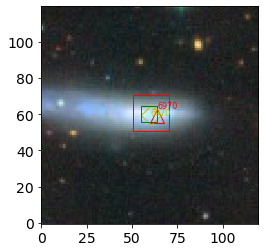

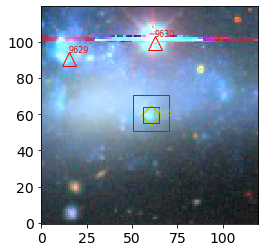

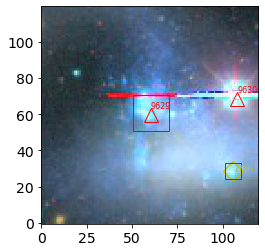

In [18]:
ids = [6970,7756,9629]
for i in ids:
    a = t.one_gal(i,imsize=120,dssflag=False)
    print(i,': ',a)

# Downloading Dust Extinction from IRSA #

- Saved the file in vf-z0MGS.tbl in ~/research/Virgo/tables
- downloaded a line-matched table.
- matched to 15arcsec resolution z0MGS catalog

In [19]:
mgs = ascii.read('/home/rfinn/research/Virgo/tables/vf-z0MGS.tbl', format='ipac')

In [23]:
matchflag = ~mgs['complete_sample'].mask
print(sum(matchflag))

3598


Can now use stellar mass and SFR for all galaxies with matches.

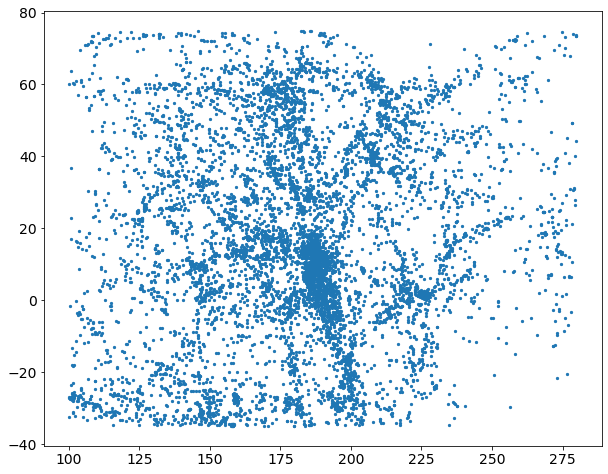

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(mgs['ra_01'],mgs['dec_01'],s=5)

# 2MASS #

- doing 1-to-1 match in irsa to see how many have matches, 10 arcsec search radius
- matched to all-sky extended source catalog (is this the right one?, will super big galaxies be in here? emailed Vandana to get her input)
- matches for 3480 galaxies


In [28]:
twomass = ascii.read('/home/rfinn/research/Virgo/tables/vf_2mass.tbl',format='ipac')

In [8]:
steer

Type_NED,Dall_err,decNED,Dmedian,Num. D Measures,NEDname,raNED,zNED,Dmedian_Steer,Dmean,Dmin,Dall,Dmax,Dmean_Steer,Galaxy ID
str6,str755,float64,float64,int64,str29,float64,float64,float64,float64,float64,str825,float64,float64,str30
G,2.72,48.30375,73.740155000527,1,2MASX J07084401+4818132,107.18337,0.020731,78.1,73.740155000527,73.740155000527,73.74,73.740155000527,78.1,2MASX J07084401+4818132
G,3.66,48.8315,79.37871170573928,1,2MASX J07085345+4849532,107.22275,0.020928,84.1,79.37871170573928,79.37871170573928,79.38,79.37871170573928,84.1,2MASX J07085345+4849532
G,2.86-5.98-6.32,-5.42792,31.058390185656297,3,2MASX J07093459-0525404,107.39413,0.005724,30.9,31.04190514854785,30.176388999973135,31.06-30.18-31.89,31.89093626001412,30.733333333333334,2MASX J07093459-0525404
G,-4841.16,-22.04481,10.512452492215363,1,2MASX J07300813-2201060,112.51767,0.002592,11.1,10.512452492215363,10.512452492215363,10.51,10.512452492215363,11.1,2MASX J07300813-2201060
G,2.75-5.88-8.09-8.35-8.45,-30.11219,39.057464450683725,5,2MASX J07412825-3006436,115.36763,0.007032,41.4,35.07030918761221,25.924121376610223,25.92-31.89-39.06-39.42-39.06,39.418858719690135,37.14,2MASX J07412825-3006436
G,10.85,13.43354,71.40095920428249,1,2MASX J07593778+1326003,119.90754,0.014935,75.6,71.40095920428249,71.40095920428249,71.40,71.40095920428249,75.6,2MASX J07593778+1326003
G,12.83,-9.90174,58.036878524628676,1,2MASX J08001030-0954062,120.0429,0.022385,61.3,58.036878524628676,58.036878524628676,58.04,58.036878524628676,61.3,2MASX J08001030-0954062
G,13.42,11.31945,63.34379022335643,1,2MASX J08002096+1119098,120.08741,0.01491,67.0,63.34379022335643,63.34379022335643,63.34,63.34379022335643,67.0,2MASX J08002096+1119098
G,3.41-6.12-13.69-14.07,21.41867,68.19096704682063,4,2MASX J08235222+2125079,125.96771,0.016995,69.15,68.46261954412418,66.4016607779013,67.25-66.40-69.13-71.07,71.06688330495413,68.92499999999998,2MASX J08235222+2125079


In [29]:
twomass

cntr_01,dist_x,pang_x,vfid_01,ra_01,dec_01,major_01,designation,ra,dec,r_k20fe,j_m_k20fe,j_msig_k20fe,j_flg_k20fe,h_m_k20fe,h_msig_k20fe,h_flg_k20fe,k_m_k20fe,k_msig_k20fe,k_flg_k20fe,k_ba,k_phi,sup_ba,sup_phi,r_ext,j_m_ext,j_msig_ext,h_m_ext,h_msig_ext,k_m_ext,k_msig_ext,cc_flg,scan_key,cntr
,arcsec,deg,,,,,,deg,deg,arcsec,mag,mag,,mag,mag,,mag,mag,,,deg,,deg,arcsec,mag,mag,mag,mag,mag,mag,,,
int64,float64,float64,int64,float64,float64,float64,str16,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,str1,int64,int64
2,2.764562,113.727153,1,182.14326477,-30.148302078,10.0,12083457-3008549,182.144073,-30.148611,12.8,14.066,0.081,0,13.304,0.078,0,13.073,0.128,0,0.5,-55,0.36,-45,23.54,13.66,0.089,13.206,0.115,12.634,0.138,0,42490,1590021
4,0.464968,-141.443154,3,181.33895874,-30.046159744,10.0,12052132-3002465,181.338867,-30.046261,12.3,14.279,0.07,0,13.547,0.063,0,13.28,0.105,0,0.3,75,0.42,70,21.17,13.946,0.082,13.358,0.087,13.13,0.153,0,22165,851227
10,0.821083,-22.966247,9,215.29333496,-29.25120163,10.0,14211037-2915035,215.293228,-29.250992,8.1,14.866,0.079,0,14.317,0.097,0,14.181,0.18,0,0.4,-25,0.74,-65,11.84,14.463,0.094,14.007,0.129,13.985,0.269,0,20927,804035
13,0.719786,27.093486,12,221.25663757,-28.884969711,10.0,14450161-2853052,221.256744,-28.884792,9.6,14.304,0.059,0,13.528,0.065,0,13.594,0.118,0,0.4,-20,0.54,-25,18.92,13.862,0.064,13.308,0.091,13.335,0.171,0,20,1033
15,0.267034,169.783185,14,144.69187927,-28.702316284,10.0,09384605-2842086,144.691895,-28.702389,14.9,13.164,0.059,0,12.444,0.068,0,12.227,0.108,0,0.5,80,0.52,75,25.75,12.918,0.064,12.258,0.078,12.078,0.118,0,45211,1674298
17,0.244642,-22.017801,16,105.62683105,-28.538438797,10.0,07023043-2832181,105.626801,-28.538376,11.6,14.076,0.076,1,13.39,0.084,1,13.213,0.146,1,0.5,-10,0.92,-25,22.16,13.691,0.085,13.191,0.117,12.724,0.158,0,15375,619033
18,0.095189,94.337932,17,195.18508911,-28.495166779,10.0,13004442-2829426,195.18512,-28.495169,7.4,14.768,0.092,0,14.008,0.104,0,13.799,0.137,0,0.7,80,0.48,50,13.71,14.438,0.117,13.467,0.115,13.564,0.2,0,3371,127553
19,1.970255,65.954758,18,159.13493347,-28.366128922,10.0,10363251-2821572,159.135498,-28.365906,9.9,14.513,0.087,1,13.742,0.079,1,13.047,0.1,1,0.5,35,0.38,30,17.04,14.292,0.119,13.476,0.11,12.915,0.137,0,18478,724300


# Cutting Catalog to Retain North Galaxies Only #

2020-Apr-07

- decided in telecon today to keep north galaxies only for now
- need to redo matching because I sorted clean_kitchen.fits by DEC so that we have continuous VFID numbers in the north.
- need to rematch to:
  - z0MGS
  - 2MASS
  - extinction
  - legacy
- updating write_subtables.py to cut catalogs





In [6]:
%run ~/github/Virgo/programs/write_subtables.py --north

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


all CO sources have been matched. CONGRATULATIONS!!!!!!!
number of galaxies with CO matches =  227
number of duplicates =  1
CO sources that are matched to multiple galaxies in the mastertable:
NED_name
--------
      --


ValueError: Arguments "names" and "dtype" must match number of columns

Now upload coords to irsa for

- z0MGS
- 2MASS extended

# Matching to CO table #

- added method in write_subtables.py
  - get_CO
  - creates vf_co.fits

CO sources with no match in mastertable:
         NEDname           NED_name
------------------------- ---------
                SHOC 206b  SHOC206b
        UGC 08656 NOTES01   UGC8656
                UGC 09348   UGC9348
WISEA J150535.77+590537.2 ASK110438
number of galaxies with CO matches =  225


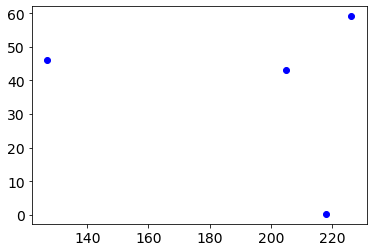

In [42]:
%run ~/github/Virgo/programs/write_subtables.py
c.get_CO()

## Before adding nsa_v0_1_2 ##

- galaxies with NED names (from query) that are significantly different from NED name in CO file

In [54]:
n1 = c.cotable['NEDname'][c.coflag]
n2 = c.cotable['NED_name'][c.coflag]
for i in range(sum(c.coflag)):
    if (n2[i][0:2] == n1[i][0:2]) & (n2[i][-2:] == n1[i][-2:]):
        continue
    else:
        print(n1[i], n2[i])

WISEA J150535.77+590537.2 ASK110438
MCG +08-25-006 PGC47274
MCG +08-16-005 SHOC206b
UGC8656 NOTES01 UGC8656
SDSS J134944.34+395905.1 NGC5313
WISEA J135224.88+393327.3 ASK322610
UGC 08919 NOTES01 ARK435
WISEA J113844.05+334817.2 UGC6610
2MASX J09512804+3256337 UGC5287
FBQS J085533.2+311242 PGC25063
SDSS J090024.12+253653.0 UGC4722
KUG 1209+203 PGC38859
SDSS J142004.36+035933.8 NGC5560
SDSS J150629.16+013620.9 NGC5846


## After adding nsa_v0_1_2 ##

- galaxies with NED names (from query) that are significantly different from NED name in CO file


In [43]:
n1 = c.cotable['NEDname'][c.coflag]
n2 = c.cotable['NED_name'][c.coflag]
for i in range(sum(c.coflag)):
    if (n2[i][0:2] == n1[i][0:2]) & (n2[i][-2:] == n1[i][-2:]):
        continue
    else:
        print(n1[i], n2[i])

FBQS J085533.2+311242 PGC25063
KUG 1209+203 PGC38859
MCG +08-25-006 PGC47274
UGC 08919 NOTES01 ARK435
WISEA J135224.88+393327.3 ASK322610


| n | VF Table NEDname| CO Table NEDname| OK? | Explanation |
|---|----------|----------|-------------|----|
|1|WISEA J150535.77+590537.2| ASK110438| Y | NED says these are the same; VF name is official |
|2|MCG +08-25-006| PGC47274|Y | NED says these are the same; VF name is official |
|3|MCG +08-16-005| SHOC206b|N | NED says MCG is SHOC 206a, SHOC 206b is not in VF catalog|
|4|UGC8656 NOTES01| UGC8656|Y | this is named wrong in CO table; still need CO obs of UGC8656 |
|5|SDSS J134944.34+395905.1| NGC5313 | N | NED says NGC5313 is SDSS J134944.34+395905.2
|6|WISEA J135224.88+393327.3 |ASK322610|
|7|UGC 08919 NOTES01| ARK435|
|8|WISEA J113844.05+334817.2 |UGC6610|
|9|2MASX J09512804+3256337| UGC5287|
|10|FBQS J085533.2+311242 |PGC25063|
|11|SDSS J090024.12+253653.0| UGC4722|
|12|KUG 1209+203 |PGC38859|
|13|SDSS J142004.36+035933.8 |NGC5560|
|14|SDSS J150629.16+013620.9| NGC5846|


## Looking at mismatches more closely ##

|Pair|Object | NED Coords | offset (arcsec)| Conclusion | 
|--|-------|--------|----------|---|
|1 |SHOC206a=MCG +08-16-005 | RA/Dec Equatorial (J2000.0)	126.825060	46.032613| 5.8 | same galaxy? |
||SHOC206b   | RA/Dec Equatorial (J2000.0)	126.825303	46.034192|
|||||||
|2 |  NGC5313 = SDSS J134944.34+395905.2 | 207.434750	39.984778 |0.1 | same galaxy |
| | SDSS J134944.34+395905.1 |207.434766, 39.984776 |

## Conclusions ##
- seems like a problem when matching the main catalog to the NED catalog
- maybe there are multiple matches with/10-15 arcsec(whatever we used for max offset), and we are choosing the wrong one.


In [56]:
def calc_offset(ra1, dec1, ra2, dec2):
    d = np.sqrt((ra2-ra1)**2 + (dec2-dec1)**2)*3600
    print('d in arcsec = {:.1f}'.format(d))

In [58]:
# pair 1
ra1, dec1 = 126.825060,46.032613
ra2, dec2 = 126.825303, 46.034192
calc_offset(ra1,dec1,ra2,dec2)

d in arcsec = 5.8


In [59]:
ra1, dec1 = 207.434750, 39.984778
ra2, dec2 = 207.434766, 39.984776 
calc_offset(ra1,dec1,ra2,dec2)

d in arcsec = 0.1


## Fixing NED names in the CO Catalog ##

- the CO catalog has NED names, but not in the exact format that NED uses
- running a ned query for each galaxy to get the right name
- then appending a column to CO mastertable called NEDname
- write new table 
  - outfile = homedir+'/github/Virgo/tables/CO-MasterFile-2018Feb16-fixedNEDnames.fits'

In [ ]:
%run ~/github/Virgo/programs/fix_CO_NEDname.py

In [42]:
outfile= homedir+'/research/Virgo/tables/CO-MasterFile-2018Feb16-fixedNEDnames.fits'

In [44]:
#c = Column(realNEDname)
#co.add_column(c,name='NEDname')                        
co.write(outfile,format='fits',overwrite=True)

## Write out subtables ##

- rewriting subtables after CO Ned names are fixed

CO sources with no match in mastertable:
         NEDname           NED_name
------------------------- ---------
                 NGC 2793   NGC2793
                SHOC 206b  SHOC206b
        UGC 08656 NOTES01   UGC8656
                UGC 09348   UGC9348
WISEA J150535.77+590537.2 ASK110438
number of galaxies with CO matches =  222


<Figure size 432x288 with 0 Axes>

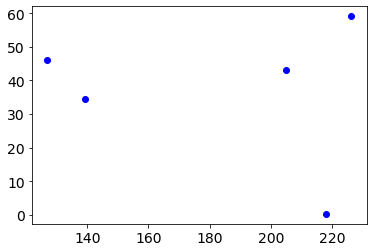

In [7]:
%run ~/github/Virgo/programs/write_subtables.py
c.get_CO()

## After including nsa_v0_1_2 ##

- 4 CO sources with no match in mastertable

CO sources with no match in mastertable:
         NEDname           NED_name
------------------------- ---------
                SHOC 206b  SHOC206b
        UGC 08656 NOTES01   UGC8656
                UGC 09348   UGC9348
WISEA J150535.77+590537.2 ASK110438
number of galaxies with CO matches =  225


<Figure size 432x288 with 0 Axes>

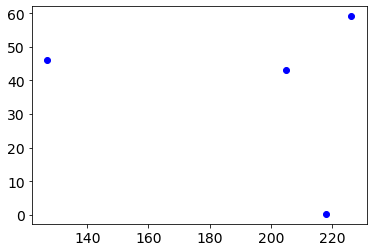

In [44]:
%run ~/github/Virgo/programs/write_subtables.py
c.get_CO()

## After Adding NSA v0_1_2, still have 4 CO sources that are not in mastertable ##

|         NEDname         | NOTES | OTHER |
|-------------------------|--------| ------|
|                SHOC 206b| NSA 015877; this is the same source as SHOC 206a 
|        UGC 08656 NOTES01| LEDA 214137 |
|                UGC 09348| in NSA 002473 (NSA version 2 vr = 27000!), SDSS, PGC 051957; should be in cat|
|WISEA J150535.77+590537.2| NSA 019809 (in v2, ZDIST=.0459; v1, ZDIST=.008867)|


### SHOC 206b ###

-  NSA 015877; this is the same source as SHOC 206a
- http://nsatlas.org/getAtlas.html?search=nsaid&nsaID=015877&submit_form=Submit 
- The NSA image shows that there is a double nucleus, so "b" is pointing to the southern nucleus and "a" is more central.  I'm assuming that the CO beam is the same.
- The NSA photometry is for the combined source
- The official NEDname of SHOC206a is MCG +08-16-005
- These should be merged in our catalog
- could reset the name in the CO table to be MCG +08-16-005, and then the matching should proceed ok.

### UGC 08656 NOTES01 ###
- This is the companion source to UGC 08656
- this was accidentally observed instead of the main source
- no cross id in NSA or AGC.  
- https://ned.ipac.caltech.edu/byname?objname=UGC%2008656%20NOTES01&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

### UGC 09348 ###

- NSA 002473
- http://nsatlas.org/getAtlas.html?search=nsaid&nsaID=2473&submit_form=Submit
- this is in the vf_clean_sample.fits
  - NEDname is NGC 5658 in our table, but this is not the NED name of UGC 9348
- NED link for UGC 09348: https://ned.ipac.caltech.edu/byname?objname=UGC%2009348&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1
- NED link for NGC 5658: https://ned.ipac.caltech.edu/byname?objname=NGC%205658&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

| OBJECT | RA | DEC | Z | AKA |
|--------|----|-----|----|---|
| UGC 09348 | 14h32m28.507s/ 218.118779| +00d17m38.43s/	0.294008 | 1672 | NSA 002473, PGC 051957 |
| NGC 5658 | 14h31m55.288s/	217.980366| -00d22m02.27s/-0.367298 | no z | WISEA J143155.28-002202.4 |

- OK, this one is really odd.  Hyperleda gives the UGC09348 coordinates for NGC5658!
  - http://leda.univ-lyon1.fr/ledacat.cgi?o=NGC%205658
  - hyperleda says the alternate name is UGC09348!  but NED has completely different coordinates for these two.  Which is correct???
  - both surveys agree on UGC09348, so best solution is to change Hyperleda name to UGC 09348
  
### WISEA J150535.77+590537.2 ###

- NSA 019809 - this is in vf_clean_sample.fits
- in our catalog, the NEDname of NSA source is 2MASX J13593307+3240534
- HL name in our catalog is PGC2586382

| OBJECT | RA | DEC | Z | AKA |
|--------|----|-----|----|---|
|  WISEA J150535.77+590537.2 | 15h05m35.727s, +59d05m37.56s | 	226.398865, 59.093766 | 2606 | NSA 019809 |

| MASX J13593307+3240534  | 13h59m33.099s, +32d40m53.00s | 	209.887914, 32.681388 |     | NSA 094608 |

| PGC2586382 | 	J150535.74+590537.7 | 

- so somehow we got the wrong NEDname for this guy.
- hmmm - looks like a lot of the ned names
- going to gather ned names again, and also save the RA and DEC.  then I can check the RA and DEC against the values in our catalog to make sure its correct.

I also just found an issue in how I was combining the RA and DEC values in clean_kitchen_sink.py, so I need to rerun this as well.

- 5 galaxies in CO table are not in mastertable.
- Gianluca said he removed some sources as well because they were too distant.
- going to check the sources that I can't match against his list
- he emailed me a list on Friday 4/17: 


|         NEDname         | NOTES |
|-------------------------|--------|
|                 NGC 2793| NSA 135797 (not in version 2 of NSA!, in version 1), PG 026189|
|                SHOC 206b| NSA 015877 (in v2, but ZDIST = .13!; v1 ZDIST=.0077) | 
|        UGC 08656 NOTES01| LEDA 214137 |
|                UGC 09348| in NSA 002473 (NSA version 2 vr = 27000!), SDSS, PGC 051957; should be in cat|
|WISEA J150535.77+590537.2| NSA 019809 (in v2, ZDIST=.0459; v1, ZDIST=.008867)|


## Remake smart_kitchen_sink.fits? ##

- remake it as version 2
- then cross match with version 1
  - see how many differences there are
  - if just a few, then we could review images for these and update catalog
  
  


In [48]:
c.testtable

NED_name,SDSS_ID,RA_1,DEC_1,CO,CO_DETECT,HI,HImass,H2mass,H2mass_upperlimit,CO10_area,CO10_area_err,CO10_V,CO10_V_err,CO10_DV,CO10_DV_err,CO10_Tpeak,CO10_Tpeak_err,CO10_rms,CO21_area,CO21_area_err,CO21_V,CO21_V_err,CO21_DV,CO21_DV_err,CO21_Tpeak,CO21_Tpeak_err,CO21_rms,NEDname,VFID,RA_2,DEC_2
str20,str20,float32,float32,str2,int32,int32,float32,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str30,str8,float32,float32
ARK499,R,243.7618,61.782055,O,1,0,-1.0,8.04,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ARK 499,VFID0418,243.7617,61.781944
CGCG021-013,V3C,227.02437,1.6515278,O,1,0,-1.0,7.81,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CGCG 021-013,VFID6422,227.02339,1.6515824
CGCG021-058,V3C,228.89421,2.2482777,L,0,0,-1.0,7.73,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CGCG 021-058,VFID6291,228.8942,2.2482562
CGCG118-019,L2B,118.43862,21.049417,L,1,0,-1.0,7.26,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CGCG 118-019,VFID3621,118.43869,21.049397
CGCG124-041,L2B,158.92517,26.125834,O,1,0,-1.0,7.47,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CGCG 124-041,VFID3224,158.92522,26.125885
CGCG150-056,L2B,135.0555,31.9984,O,0,0,-1.0,-1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CGCG 150-056,VFID2750,135.0555,31.998407
CGCG219-021,1,208.49788,39.715557,O,1,0,-1.0,7.49,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CGCG 219-021,VFID2129,208.49805,39.715458
CGCG246-005,1,202.20734,46.26239,O,1,0,-1.0,7.82,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CGCG 246-005,VFID1623,202.20737,46.262386
PGC25063,L2B,133.88829,31.2116,O,1,0,-1.0,8.32,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FBQS J085533.2+311242,VFID2817,133.8883,31.211664


In [33]:
for i in range(len(c.realNEDname)): print(c.realNEDname[i], c.co['NED_name'][i])

b'CGCG 118-019' CGCG118-019
b'IC 2256' IC2256
b'NGC 2577' NGC2577
b'UGC 04375' UGC4375
b'IC 2361' IC2361
b'UGC 04395' UGC4395
b'NGC 2592' NGC2592
b'NGC 2594' NGC2594
b'SHOC 206b' SHOC206b
b'NGC 2604' NGC2604
b'KUG 0830+278' KUG0830+278
b'NGC 2608' NGC2608
b'UGC 04551' UGC4551
b'UGC 04559' UGC4559
b'KUG 0848+311' KUG0848+311
b'NGC 2679' NGC2679
b'UGC 04659' UGC4659
b'FBQS J085533.2+311242' PGC25063
b'NGC 2712' NGC2712
b'CGCG 150-056' CGCG150-056
b'UGC 04722' UGC4722
b'NGC 2780' NGC2780
b'NGC 2793' NGC2793
b'IC 2450' IC2450
b'NGC 2798' NGC2798
b'NGC 2799' NGC2799
b'NGC 2844' NGC2844
b'NGC 2852' NGC2852
b'NGC 2853' NGC2853
b'NGC 2859' NGC2859
b'UGC 05015' UGC5015
b'UGC 05020' UGC5020
b'NGC 2893' NGC2893
b'KUG 0933+293' KUG0933+293
b'NGC 2964' NGC2964
b'NGC 2968' NGC2968
b'NGC 2970' NGC2970
b'MRK 0408' MRK408
b'NGC 3003' NGC3003
b'NGC 3026' NGC3026
b'NGC 3021' NGC3021
b'UGC 05287' UGC5287
b'NGC 3032' NGC3032
b'UGC 05326' UGC5326
b'NGC 3067' NGC3067
b'NGC 3098' NGC3098
b'UGCA 201' UGCA201
b

In [27]:
cofile = homedir+'/github/Virgo/tables/CO-MasterFile-2018Feb16.fits'
co = Table(fits.getdata(cofile))

In [28]:
co

NED_name,SDSS_ID,RA,DEC,CO,CO_DETECT,HI,HImass,H2mass,H2mass_upperlimit,CO10_area,CO10_area_err,CO10_V,CO10_V_err,CO10_DV,CO10_DV_err,CO10_Tpeak,CO10_Tpeak_err,CO10_rms,CO21_area,CO21_area_err,CO21_V,CO21_V_err,CO21_DV,CO21_DV_err,CO21_Tpeak,CO21_Tpeak_err,CO21_rms
str20,str20,float32,float32,str2,int32,int32,float32,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
CGCG118-019,L2B,118.43862,21.049417,L,1,0,-1.0,7.26,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC2256,L2B,124.226875,24.1766,O,2,1,5.0,7.16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NGC2577,L2B,125.68104,22.553083,L,0,0,0.3,7.71,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UGC4375,L2B,125.797,22.6647,O,1,1,16.4,8.15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC2361,L2B,126.43537,27.8745,O,1,1,1.0,8.04,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UGC4395,L2B,126.44829,28.118,O,0,1,6.2,-1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NGC2592,L2B,126.78354,25.970306,L,0,0,-1.0,7.54,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NGC2594,L2B,126.8215,25.878805,L,0,0,-1.0,7.83,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SHOC206b,L2B,126.825294,46.034195,O,0,0,-1.0,-1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
c.cotable

VFID,RA_1,DEC_1,NEDname,NED_name,SDSS_ID,RA_2,DEC_2,CO,CO_DETECT,HI,HImass,H2mass,H2mass_upperlimit,CO10_area,CO10_area_err,CO10_V,CO10_V_err,CO10_DV,CO10_DV_err,CO10_Tpeak,CO10_Tpeak_err,CO10_rms,CO21_area,CO21_area_err,CO21_V,CO21_V_err,CO21_DV,CO21_DV_err,CO21_Tpeak,CO21_Tpeak_err,CO21_rms,COFlag
str8,float32,float32,str30,str20,str20,float32,float32,str2,int32,int32,float32,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool
VFID0000,185.86877,74.95225,NGC 4363,,,0.0,0.0,,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
VFID0001,182.208,74.904274,NGC 4133,,,0.0,0.0,,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
VFID0002,145.94466,74.85958,NGC 2977,,,0.0,0.0,,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
VFID0003,185.57309,74.83839,CGCG 352-030,,,0.0,0.0,,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
VFID0004,182.82774,74.80822,UGC 07189,,,0.0,0.0,,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
VFID0005,173.13419,74.62754,NGC 3752,,,0.0,0.0,,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
VFID0006,121.91241,74.58463,UGC 04202,,,0.0,0.0,,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
VFID0007,118.2363,74.57653,KUG 0746+747,,,0.0,0.0,,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
VFID0008,274.94318,74.56839,NGC 6643,,,0.0,0.0,,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


# Rechecking CO matches after getting NED name query to work #

- reran NED query with 1 second delay
- get NED ids for all galaxies with a match to HL, AGC or NSA name
- did not search by position for other galaxies yet b/c I need to fix problem with RA rounding first

In [22]:
n1 = c.cotable['NEDname'][c.coflag]
n2 = c.cotable['NED_name'][c.coflag]
count = 0
for i in range(sum(c.coflag)):
    if (n2[i][0:2] == n1[i][0:2]) & (n2[i][-2:] == n1[i][-2:]):
        continue
    else:
        print(n1[i], n2[i])
        count += 1
print('\nnumber of potential failures = ',count)

2MASX J13593307+3240534 ASK110438
MCG +08-25-006 PGC47274
MCG +08-16-005 SHOC206b
UGC8656 NOTES01 UGC8656
WISEA J135224.88+393327.3 ASK322610
UGC 08919 NOTES01 ARK435
 NGC2793
FBQS J085533.2+311242 PGC25063
KUG 1209+203 PGC38859
NGC 5658 UGC9348

number of potential failures =  10


## match CO by name rather than position ##
- this would be easy, except the NED names in the CO file are not the exact same as what NED considers the NED name.
- for example:  for an NGC galaxy, NED would have a space between the NGC and number

OPTIONS:
- could look up NED name for each galaxy in the CO table
- then match the real NED names to NEDname column in the master table
- this might be the most efficient.
- need to change UGC8656 to UGC8656 NOTES01 

In [72]:
hlfile = homedir+'/github/Virgo/tables/hyperleda-finn-24Feb20.csv'      
hl = ascii.read(hlfile)
hl = Table(hl)

In [73]:
hl

objname,objtype,de2000,al2000,v,e_v,vopt,e_vopt,vrad,e_vrad,bt,e_bt,type,bar,ring,multiple,compactness,t,e_t,logd25,e_logd25,logr25,e_logr25,pa,incl,logdc,btc,itc,ubtc,bvtc,m21c,hic,mabs,agnclass,kt,e_kt,it,e_it,ut,vt,mfir,e_ut,e_vt
str28,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str1,str1,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64
PGC720745,G,-30.1542764,13.3716443,2489.0,10.0,2489.0,10.0,--,--,17.25,0.5,S?,--,--,--,--,3.0,5.0,0.65,0.078,0.19,0.028,12.0,52.21,0.671,16.645,--,--,--,--,--,-16.089,--,--,--,--,--,--,--,--,--,--
PGC720820,G,-30.1483018,12.1428842,2132.4,42.8,2132.4,42.8,--,--,16.08,0.5,E,--,--,--,--,-5.0,3.5,0.804,0.063,0.23,0.027,134.14,90.0,0.839,15.775,14.195,--,--,--,--,-16.566,--,12.655,0.19,14.316,0.103,--,--,--,--,--
PGC721308,G,-30.1088661,13.04042,3214.1,39.2,3214.1,39.2,--,--,16.97,0.5,S?,--,--,--,--,5.0,5.0,0.84,0.06,0.56,0.028,25.0,78.97,0.848,15.703,15.247,--,--,--,--,-17.6,--,--,--,15.39,0.077,--,--,--,--,--
PGC722090,G,-30.0461599,12.0892644,2015.8,39.2,2015.8,39.2,--,--,16.5,0.5,Sbc,--,--,--,--,4.0,3.7,0.86,0.058,0.47,0.028,71.5,75.08,0.87,15.451,14.331,--,--,--,--,-16.757,--,13.041,0.136,14.465,0.075,--,--,--,--,--
PGC722221,G,-30.0359823,13.3372279,1663.7,38.6,1663.7,38.6,--,--,16.39,0.5,E?,--,--,--,--,-2.0,5.0,0.99,0.049,0.44,0.028,29.0,90.0,1.006,16.065,--,--,--,--,--,-15.798,--,--,--,--,--,--,--,--,--,--
PGC723997,G,-29.8873736,12.9561344,3109.7,15.9,3109.7,15.9,--,--,17.27,0.5,S?,--,--,--,--,7.0,5.0,0.66,0.077,0.39,0.028,91.0,67.65,0.679,16.191,16.673,--,--,--,--,-17.026,--,--,--,16.835,0.072,--,--,--,--,--
PGC727168,G,-29.6197531,11.5421459,1575.7,39.2,1575.7,39.2,--,--,16.9,0.5,E?,--,--,--,--,-5.0,5.0,0.665,0.064,0.24,0.092,27.0,90.0,0.701,16.592,15.717,--,--,--,--,-15.047,--,13.936,0.54,15.842,0.296,--,--,--,--,--
PGC727305,G,-29.6084722,12.9938861,3096.3,45.0,3096.3,45.0,--,--,18.21,0.5,--,--,--,--,--,--,--,0.53,0.092,0.14,0.028,40.0,44.48,--,17.781,16.105,--,--,--,--,-15.436,--,--,--,16.28,0.269,--,--,--,--,--
PGC729818,G,-29.3984784,13.9579767,2674.0,60.0,2674.0,60.0,--,--,16.84,0.5,E?,--,--,--,--,-5.0,5.0,0.64,0.079,0.14,0.028,142.0,70.89,0.677,16.537,15.384,--,--,--,--,-16.37,--,12.465,0.378,15.5,0.077,--,--,--,--,--


In [82]:
c1 = Column(hl['al2000']*15,name='RAdeg')
hl.add_column(c1)
hl.write('temp.fits',format='fits',overwrite=True)

In [83]:
t = fits.getdata('temp.fits')

In [85]:
t.RAdeg

array([200.5746645, 182.143263 , 195.6063   , ..., 186.696138 ,
       185.203422 , 180.750882 ])

# Trying NED query again#

- add pause of 1 second between queries

In [15]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/clean_kitchen_sink.py

number of A100-only before cleaning =  43
number of A100-only after cleaning =  11
merging 9144 with 7423
merging 9145 with 6575
merging 9147 with 6638
merging 9151 with 8949
oh no - could not find NED name! so sorry... 0
oh no - could not find NED name! so sorry... 5
oh no - could not find NED name! so sorry... 7
oh no - could not find NED name! so sorry... 8
oh no - could not find NED name! so sorry... 10
oh no - could not find NED name! so sorry... 11
oh no - could not find NED name! so sorry... 17
oh no - could not find NED name! so sorry... 20
oh no - could not find NED name! so sorry... 21
oh no - could not find NED name! so sorry... 22
oh no - could not find NED name! so sorry... 23
oh no - could not find NED name! so sorry... 24
oh no - could not find NED name! so sorry... 25
oh no - could not find NED name! so sorry... 26
oh no - could not find NED name! so sorry... 28
oh no - could not find NED name! so sorry... 31
oh no - could not find NED name! so sorry... 35
oh no - could

oh no - could not find NED name! so sorry... 418
oh no - could not find NED name! so sorry... 419
oh no - could not find NED name! so sorry... 420
oh no - could not find NED name! so sorry... 422
oh no - could not find NED name! so sorry... 424
oh no - could not find NED name! so sorry... 425
oh no - could not find NED name! so sorry... 427
oh no - could not find NED name! so sorry... 432
oh no - could not find NED name! so sorry... 435
oh no - could not find NED name! so sorry... 437
oh no - could not find NED name! so sorry... 438
oh no - could not find NED name! so sorry... 439
oh no - could not find NED name! so sorry... 441
oh no - could not find NED name! so sorry... 442
oh no - could not find NED name! so sorry... 444
oh no - could not find NED name! so sorry... 445
oh no - could not find NED name! so sorry... 446
oh no - could not find NED name! so sorry... 447
oh no - could not find NED name! so sorry... 448
oh no - could not find NED name! so sorry... 449
oh no - could not fi

oh no - could not find NED name! so sorry... 1666
oh no - could not find NED name! so sorry... 1669
oh no - could not find NED name! so sorry... 1671
oh no - could not find NED name! so sorry... 1675
oh no - could not find NED name! so sorry... 1676
oh no - could not find NED name! so sorry... 1679
oh no - could not find NED name! so sorry... 1689
oh no - could not find NED name! so sorry... 1696
oh no - could not find NED name! so sorry... 1708
oh no - could not find NED name! so sorry... 1714
oh no - could not find NED name! so sorry... 1717
oh no - could not find NED name! so sorry... 1724
oh no - could not find NED name! so sorry... 1728
oh no - could not find NED name! so sorry... 1730
oh no - could not find NED name! so sorry... 1735
oh no - could not find NED name! so sorry... 1755
oh no - could not find NED name! so sorry... 1760
oh no - could not find NED name! so sorry... 1764
oh no - could not find NED name! so sorry... 1765
oh no - could not find NED name! so sorry... 1766


4716 2 NED did not like  [KHL2017]UCD37
oh no - could not find NED name! so sorry... 4716
4717 2 NED did not like  [KHL2017]UCD38
oh no - could not find NED name! so sorry... 4717
4718 2 NED did not like  [KHL2017]UCD40
oh no - could not find NED name! so sorry... 4718
4719 2 NED did not like  [KHL2017]UCD41
oh no - could not find NED name! so sorry... 4719
4720 2 NED did not like  [KHL2017]UCD47
oh no - could not find NED name! so sorry... 4720
4721 2 NED did not like  [KHL2017]UCD50
oh no - could not find NED name! so sorry... 4721
4722 2 NED did not like  [KHL2017]UCD51
oh no - could not find NED name! so sorry... 4722
4723 2 NED did not like  [KHL2017]UCD52
oh no - could not find NED name! so sorry... 4723
4724 2 NED did not like  [KHL2017]UCD53
oh no - could not find NED name! so sorry... 4724
4725 2 NED did not like  [KHL2017]UCD54
oh no - could not find NED name! so sorry... 4725
4726 2 NED did not like  [KHL2017]UCD55
oh no - could not find NED name! so sorry... 4726
4727 2 NED

5308 2 NED did not like  AGC219532
5308 2 NED did not like  AGC219532
oh no - could not find NED name! so sorry... 5308
5309 2 NED did not like  PGC1191771
5309 2 NED did not like  NSA 66715
5309 2 NED did not like  AGC213172
oh no - could not find NED name! so sorry... 5309
5310 2 NED did not like  SDSSJ114201.70+164032.4
5310 2 NED did not like  NSA 522144
5310 2 NED did not like  AGC741264
oh no - could not find NED name! so sorry... 5310
5311 2 NED did not like  NGC3827
5311 2 NED did not like  NSA 521382
5311 2 NED did not like  AGC6673
oh no - could not find NED name! so sorry... 5311
5312 2 NED did not like  PGC1393002
5312 2 NED did not like  NSA 693554
5312 2 NED did not like  AGC213333
oh no - could not find NED name! so sorry... 5312
5313 2 NED did not like  AGC219536
5313 2 NED did not like  AGC219536
oh no - could not find NED name! so sorry... 5313
5314 2 NED did not like  PGC1401182
5314 2 NED did not like  NSA 693555
5314 2 NED did not like  AGC213336
oh no - could not 

oh no - could not find NED name! so sorry... 7684
oh no - could not find NED name! so sorry... 7697
oh no - could not find NED name! so sorry... 7699
oh no - could not find NED name! so sorry... 7717
oh no - could not find NED name! so sorry... 7730
oh no - could not find NED name! so sorry... 7731
oh no - could not find NED name! so sorry... 7732
oh no - could not find NED name! so sorry... 7748
7752 2 NED did not like  [PBS2011]J132454.4-201745
oh no - could not find NED name! so sorry... 7752
7765 2 NED did not like  SDSSJ081038.74+223860.0
oh no - could not find NED name! so sorry... 7765
oh no - could not find NED name! so sorry... 7767
oh no - could not find NED name! so sorry... 7778
oh no - could not find NED name! so sorry... 7779
oh no - could not find NED name! so sorry... 7780
oh no - could not find NED name! so sorry... 7781
oh no - could not find NED name! so sorry... 7782
oh no - could not find NED name! so sorry... 7794
oh no - could not find NED name! so sorry... 7797


oh no - could not find NED name! so sorry... 8551
oh no - could not find NED name! so sorry... 8554
oh no - could not find NED name! so sorry... 8556
oh no - could not find NED name! so sorry... 8567
oh no - could not find NED name! so sorry... 8569
oh no - could not find NED name! so sorry... 8585
oh no - could not find NED name! so sorry... 8594
oh no - could not find NED name! so sorry... 8604
oh no - could not find NED name! so sorry... 8605
oh no - could not find NED name! so sorry... 8607
oh no - could not find NED name! so sorry... 8608
oh no - could not find NED name! so sorry... 8618
oh no - could not find NED name! so sorry... 8619
oh no - could not find NED name! so sorry... 8620
oh no - could not find NED name! so sorry... 8621
oh no - could not find NED name! so sorry... 8623
oh no - could not find NED name! so sorry... 8627
oh no - could not find NED name! so sorry... 8633
oh no - could not find NED name! so sorry... 8635
oh no - could not find NED name! so sorry... 8637


oh no - could not find NED name! so sorry... 9064
oh no - could not find NED name! so sorry... 9065
oh no - could not find NED name! so sorry... 9066
oh no - could not find NED name! so sorry... 9067
oh no - could not find NED name! so sorry... 9068
oh no - could not find NED name! so sorry... 9069
oh no - could not find NED name! so sorry... 9070
oh no - could not find NED name! so sorry... 9071
oh no - could not find NED name! so sorry... 9072
oh no - could not find NED name! so sorry... 9073
oh no - could not find NED name! so sorry... 9074
oh no - could not find NED name! so sorry... 9075
oh no - could not find NED name! so sorry... 9076
oh no - could not find NED name! so sorry... 9077
oh no - could not find NED name! so sorry... 9078
oh no - could not find NED name! so sorry... 9079
oh no - could not find NED name! so sorry... 9080
oh no - could not find NED name! so sorry... 9081
oh no - could not find NED name! so sorry... 9082
oh no - could not find NED name! so sorry... 9083


In [16]:
n = fits.getdata('ned_names.fits')

In [18]:
t = Table(n)

In [19]:
print(t)

          NEDname           
----------------------------
                            
     2MASX J12083457-3008549
GALEXASC J130225.53-300632.6
   WISEA J120521.43-300245.9
   WISEA J132013.97-300210.6
                            
   WISEA J113231.73-293710.4
                            
                            
   WISEA J142110.39-291504.7
                         ...
                            
                            
                            
                            
                   UGC 08363
     2MASX J09473857+0449179
                    Leo dw A
           ADBS J101903+2209
    SDSS J121639.61+085004.4
                  AGC 258535
   WISEA J114757.63+163543.1
Length = 9151 rows


In [20]:
n1 = c.cotable['NEDname'][c.coflag]
n2 = c.cotable['NED_name'][c.coflag]
count = 0
for i in range(sum(c.coflag)):
    if (n2[i][0:2] == n1[i][0:2]) & (n2[i][-2:] == n1[i][-2:]):
        continue
    else:
        print(n1[i], n2[i])
        count += 1
print('\nnumber of potential failures = ',count)

AttributeError: 'catalog' object has no attribute 'cotable'

# Steer+17 Table with Redshift-independent distances #

- Downloaded this from NED webpage
- http://ned.ipac.caltech.edu/Library/Distances/
- did a first matching in topcat, based on NED name
  - best match, symmetric, all from 1
  - found 2411 pairs
  - saved as fits-basic
  - ~/research/Virgo/tables/vf-steer17.fits
  
### Need to use Gianluca's catalog instead. ###

- he has combined independent distance measurements for each galaxy (using median), and scaled to same value of H0
  - /home/rfinn/research/Virgo/ancil-tables/Steer2017_cat_Virgo_field_H0_74_0.fits
  
- editing **write_subtables.py** to do the matching
  - subroutine match_steer17
  
- match by NEDname


In [9]:
steercat = '/home/rfinn/research/Virgo/ancil-tables/Steer2017_cat_Virgo_field_H0_74_0.fits'
steer = Table(fits.getdata(steercat))

In [10]:
steer

Type_NED,Dall_err,decNED,Dmedian,Num. D Measures,NEDname,raNED,zNED,Dmedian_Steer,Dmean,Dmin,Dall,Dmax,Dmean_Steer,Galaxy ID
str6,str755,float64,float64,int64,str29,float64,float64,float64,float64,float64,str825,float64,float64,str30
G,2.72,48.30375,73.740155000527,1,2MASX J07084401+4818132,107.18337,0.020731,78.1,73.740155000527,73.740155000527,73.74,73.740155000527,78.1,2MASX J07084401+4818132
G,3.66,48.8315,79.37871170573928,1,2MASX J07085345+4849532,107.22275,0.020928,84.1,79.37871170573928,79.37871170573928,79.38,79.37871170573928,84.1,2MASX J07085345+4849532
G,2.86-5.98-6.32,-5.42792,31.058390185656297,3,2MASX J07093459-0525404,107.39413,0.005724,30.9,31.04190514854785,30.176388999973135,31.06-30.18-31.89,31.89093626001412,30.733333333333334,2MASX J07093459-0525404
G,-4841.16,-22.04481,10.512452492215363,1,2MASX J07300813-2201060,112.51767,0.002592,11.1,10.512452492215363,10.512452492215363,10.51,10.512452492215363,11.1,2MASX J07300813-2201060
G,2.75-5.88-8.09-8.35-8.45,-30.11219,39.057464450683725,5,2MASX J07412825-3006436,115.36763,0.007032,41.4,35.07030918761221,25.924121376610223,25.92-31.89-39.06-39.42-39.06,39.418858719690135,37.14,2MASX J07412825-3006436
G,10.85,13.43354,71.40095920428249,1,2MASX J07593778+1326003,119.90754,0.014935,75.6,71.40095920428249,71.40095920428249,71.40,71.40095920428249,75.6,2MASX J07593778+1326003
G,12.83,-9.90174,58.036878524628676,1,2MASX J08001030-0954062,120.0429,0.022385,61.3,58.036878524628676,58.036878524628676,58.04,58.036878524628676,61.3,2MASX J08001030-0954062
G,13.42,11.31945,63.34379022335643,1,2MASX J08002096+1119098,120.08741,0.01491,67.0,63.34379022335643,63.34379022335643,63.34,63.34379022335643,67.0,2MASX J08002096+1119098
G,3.41-6.12-13.69-14.07,21.41867,68.19096704682063,4,2MASX J08235222+2125079,125.96771,0.016995,69.15,68.46261954412418,66.4016607779013,67.25-66.40-69.13-71.07,71.06688330495413,68.92499999999998,2MASX J08235222+2125079


In [11]:
n1 = ['a','b','c']
n2 = ['b','c','d','a']
t = np.searchsorted(n1,n2)

In [12]:
t

array([1, 2, 3, 0])

In [15]:
test = Table(steer['Dmedian','NEDname'])

In [16]:
test

Dmedian,NEDname
float64,str29
73.740155000527,2MASX J07084401+4818132
79.37871170573928,2MASX J07085345+4849532
31.058390185656297,2MASX J07093459-0525404
10.512452492215363,2MASX J07300813-2201060
39.057464450683725,2MASX J07412825-3006436
71.40095920428249,2MASX J07593778+1326003
58.036878524628676,2MASX J08001030-0954062
63.34379022335643,2MASX J08002096+1119098
68.19096704682063,2MASX J08235222+2125079
